<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/PETR4_23_11_to_15_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [ ]:
!pip install mplfinance

In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Parâmetros
inicio = '2022-09-20'
fim = '2023-09-20'
# fim = date.today()
ticker = 'CRFB3.SA'
fonte = 'yahoo'
Selic = 12.75
#O preço justo da ação no modelo de Gordon, é: R$ 9.69
#O preço justo da ação no modelo de Bazin, é: R$ 8.07
preço_justo_Gordon =9.69
preço_justo_Bazin =8.07

In [ ]:
Ativo = yf.download(ticker, start=inicio)
Ativo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-20,20.670000,21.830000,20.670000,21.510000,21.132996,9527200
2022-09-21,21.600000,22.070000,21.190001,21.400000,21.024921,5404400
2022-09-22,21.700001,21.860001,21.120001,21.639999,21.260715,4412400
2022-09-23,21.290001,21.590000,20.760000,20.950001,20.582809,5635200
2022-09-26,20.740000,20.900000,20.240000,20.270000,19.914726,1971800
...,...,...,...,...,...,...
2023-09-26,8.850000,8.890000,8.600000,8.710000,8.710000,8161000
2023-09-27,8.720000,9.040000,8.630000,8.850000,8.850000,11446900
2023-09-28,8.820000,9.080000,8.780000,8.890000,8.890000,6306800


In [ ]:
ohlc = Ativo.loc[:, ['Open', 'High', 'Low', 'Close']]
ohlc.shape
ohlc.head(2)
ohlc.tail(2)

,Open,High,Low,Close
Date,,,,
2023-09-29,8.97,9.16,8.78,8.90
2023-10-02,8.86,8.94,8.70,8.84


In [ ]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

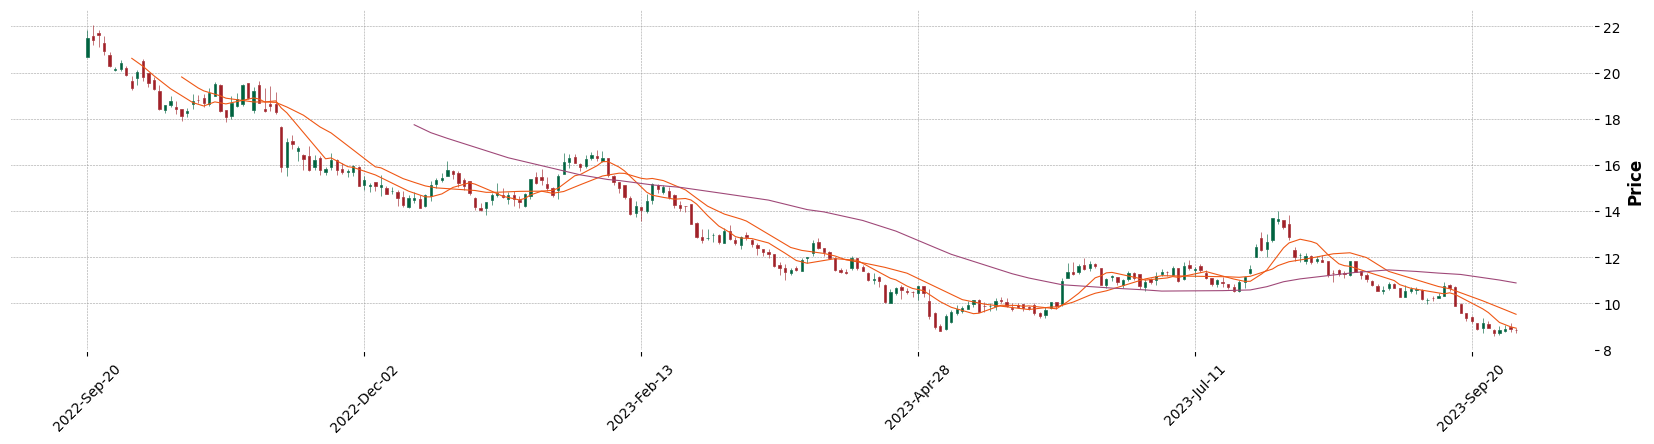

In [ ]:
kwargs = dict(type='candle',mav=(9,18,60),volume=False,figratio=(18,4),figscale=0.85)
mpf.plot(ohlc,**kwargs,style='charles')

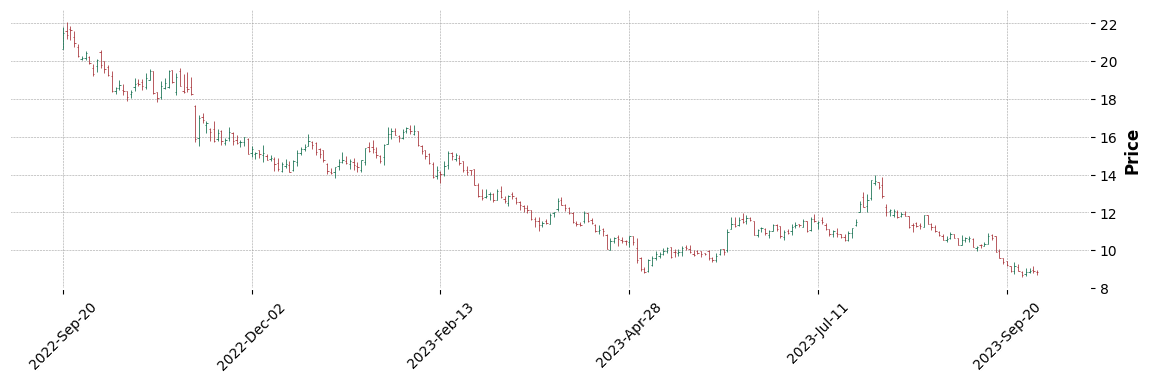

In [ ]:
mpf.plot(ohlc,style='charles',figsize=(15,4))
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)

In [ ]:
Ativo_Ajustado = Ativo.drop(Ativo.columns[[0,1,2,3,5]],axis=1)
Ativo_Ajustado.head(2)

,Adj Close
Date,
2022-09-20,21.132996
2022-09-21,21.024921


In [ ]:
Ativo_Ajustado['Preço_G'] =preço_justo_Gordon
Ativo_Ajustado['Preço_B'] =preço_justo_Bazin
Ativo_Ajustado

,Adj Close,Preço_G,Preço_B
Date,,,
2022-09-20,21.132996,9.69,8.07
2022-09-21,21.024921,9.69,8.07
2022-09-22,21.260715,9.69,8.07
2022-09-23,20.582809,9.69,8.07
2022-09-26,19.914726,9.69,8.07
...,...,...,...
2023-09-26,8.710000,9.69,8.07
2023-09-27,8.850000,9.69,8.07
2023-09-28,8.890000,9.69,8.07


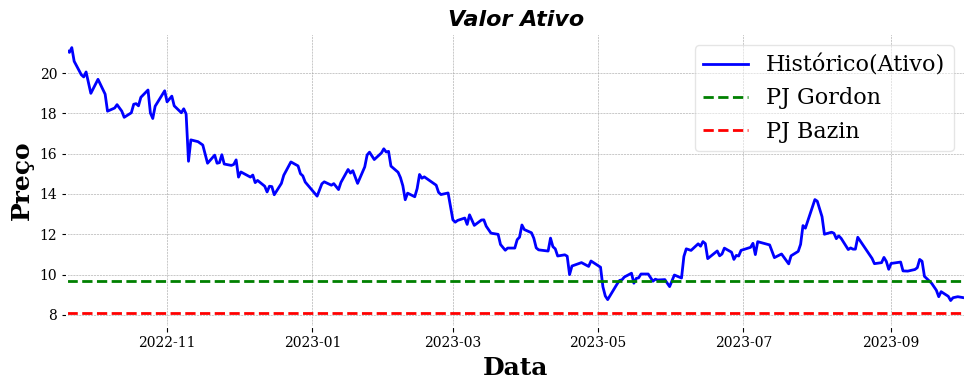

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Ativo', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Ativo_Ajustado['Adj Close'],label='Histórico(Ativo)', color='blue', linewidth=2)
plt.plot(Ativo_Ajustado['Preço_G'],label='PJ Gordon', color='green', linewidth=2, linestyle='dashed')
plt.plot(Ativo_Ajustado['Preço_B'],label='PJ Bazin', color='red', linewidth=2, linestyle='dashed')
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [ ]:
Ativo_Ajustado.describe()

,Adj Close,Preço_G,Preço_B
count,259.000000,259.00,2.590000e+02
mean,13.198010,9.69,8.070000e+00
std,3.053159,0.00,1.779796e-15
min,8.710000,9.69,8.070000e+00
25%,10.884876,9.69,8.070000e+00
50%,12.241626,9.69,8.070000e+00
75%,15.112494,9.69,8.070000e+00
max,21.260715,9.69,8.070000e+00


#Cálculo da Volatilidade

In [ ]:
Volatilidade = Ativo_Ajustado['Adj Close'].std()
Volatilidade

3.053158750692542

<Axes: xlabel='Date'>

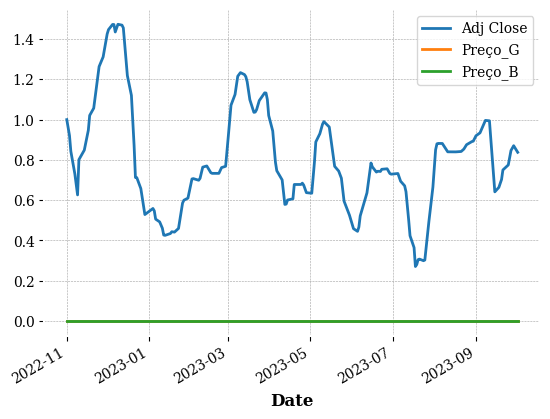

In [ ]:
MM_Volat = Ativo_Ajustado.rolling(window=30).std()
MM_Volat.plot()

In [ ]:
Ativo1 = Ativo_Ajustado.tail(1)
Ativo1

,Adj Close,Preço_G,Preço_B
Date,,,
2023-10-02,8.84,9.69,8.07


In [ ]:
#Último valor do ativo
Ativo1['Adj Close'].values[0]

8.84000015258789

In [ ]:
#De outra forma ...
Ativo = Ativo1.at[Ativo1.index[-1],'Adj Close']
Ativo

8.84000015258789

In [ ]:
# Máximo valor para dois desvios padrâo
Ativo_Máximo = Ativo + 2*Volatilidade
Ativo_Máximo

14.946317653972976

In [ ]:
# Mínimo valor para dois desvios padrâo
Ativo_Mínimo = Ativo - 2*Volatilidade
Ativo_Mínimo

2.7336826512028063

<Axes: ylabel='Frequency'>

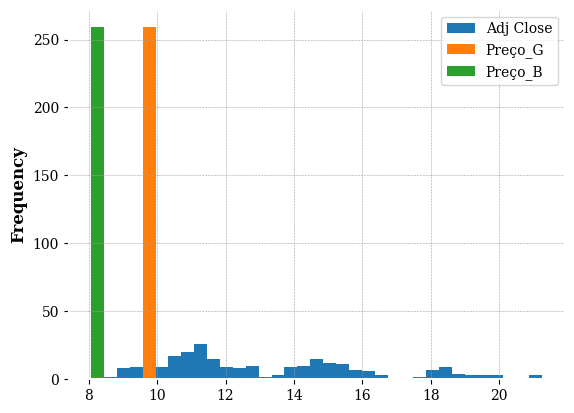

In [ ]:
Ativo_Ajustado.plot.hist(bins=35)

In [ ]:
div = vbt.YFData.download(ticker,start = inicio).get('Dividends')
div.tail()

Date
2023-09-26 03:00:00+00:00    0.0
2023-09-27 03:00:00+00:00    0.0
2023-09-28 03:00:00+00:00    0.0
2023-09-29 03:00:00+00:00    0.0
2023-10-02 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [ ]:
# Soma de dividendos (R$) no último ano
Soma_Div = div.sum()
Soma_Div

0.22050799999999998

In [ ]:
#De outra forma ...
Soma_Div1 = div.rolling('365D').sum()
Soma_Div1.tail()

Date
2023-09-26 03:00:00+00:00    0.220508
2023-09-27 03:00:00+00:00    0.220508
2023-09-28 03:00:00+00:00    0.220508
2023-09-29 03:00:00+00:00    0.220508
2023-10-02 03:00:00+00:00    0.220508
Name: Dividends, dtype: float64

In [ ]:
# Dividend Yeild
DVY = Soma_Div/Ativo
DVY

0.024944343460836564

In [ ]:
Valor_Empresa = Soma_Div/(Selic)
Valor_Empresa

0.017294745098039216

# Análise dos Prêmios

In [ ]:
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 'Planilha2')
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols=[5,6])
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G")
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G", skiprows=7) /Para pular as 7 linhas iniciais
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G", nrows=7) /Para pegar as 7 linhas iniciais
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = None)  /Para ler todas as abas da planilha
#display (Opções['Planilha2'])  /Para lmostrar apenas a Planilha2
#display Opções.to_excel("Nome do Arquivo")  /Para criar um arquivo em Excell

In [ ]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/Opções CRFB3_29_09_23.xlsx",)
Opções.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,2.09,0.99,-0.0039,2.04,-2.04,0.0,0.0,6.87,0.01,0.00,0.01,0.0,-0.0005,-0.01,0.00,0.01
1,0.00,1.70,0.98,-0.0052,1.64,-1.64,0.0,0.0,7.27,0.00,0.10,0.00,0.0,-0.0016,-0.02,0.01,0.00
2,0.00,1.32,0.94,-0.0077,1.24,-1.24,0.0,0.0,7.67,0.00,0.10,0.02,0.0,-0.0039,-0.06,0.03,0.02
3,0.00,0.97,0.85,-0.0111,0.84,-0.84,0.0,0.0,8.07,0.00,0.15,0.06,0.0,-0.0071,-0.15,0.07,0.06
4,0.68,0.67,0.72,-0.0142,0.44,0.24,0.0,0.0,8.47,0.06,0.28,0.10,0.0,-0.0103,-0.30,0.19,0.10


In [ ]:
Seleção_de_colunas = Opções.iloc[[1,2,3,4,5,6,7,8],[8,12]]
Seleção_de_colunas.head(3)

,Strike,Intrínseco.1
1,7.27,0.0
2,7.67,0.0
3,8.07,0.0


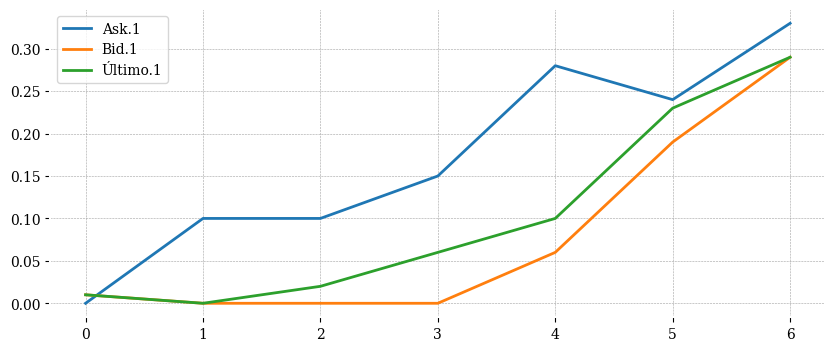

In [ ]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

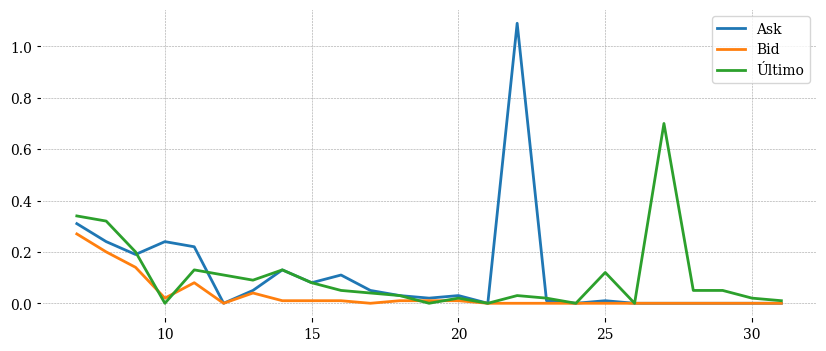

In [ ]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0)]
CALLs_OTM[['Ask','Bid','Último']].plot(figsize = (10,4));

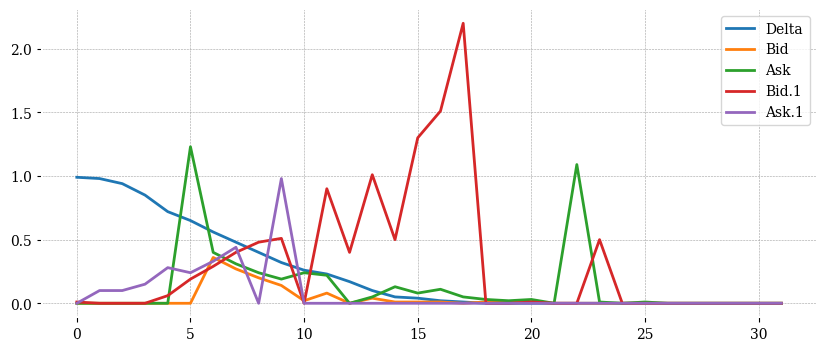

In [ ]:
Opções[['Delta', 'Bid','Ask', 'Bid.1','Ask.1']].plot(figsize = (10,4));

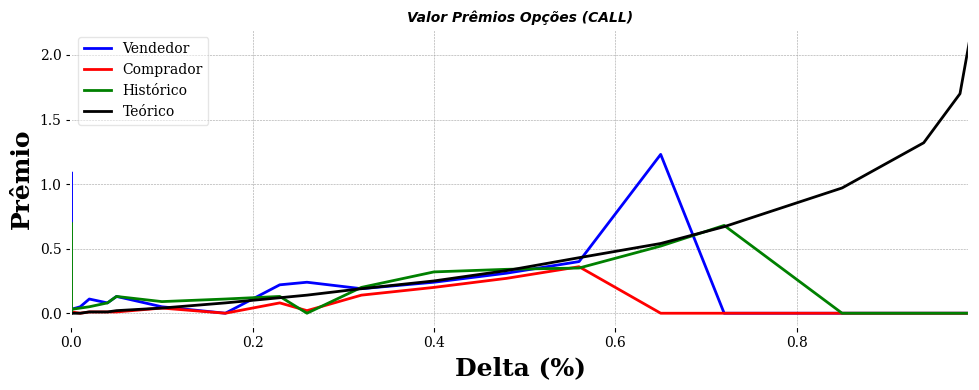

In [ ]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

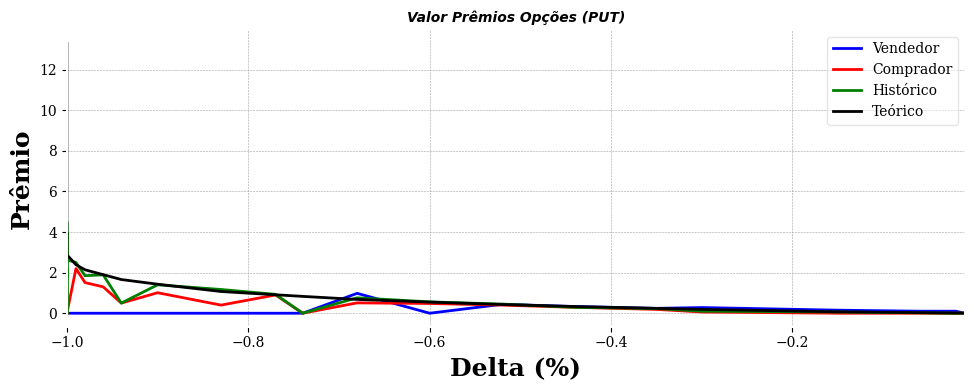

In [ ]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Prêmios Opções (PUT)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta.1'],Opções['Ask.1'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Bid.1'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Último.1'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Preço Teórico.1'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

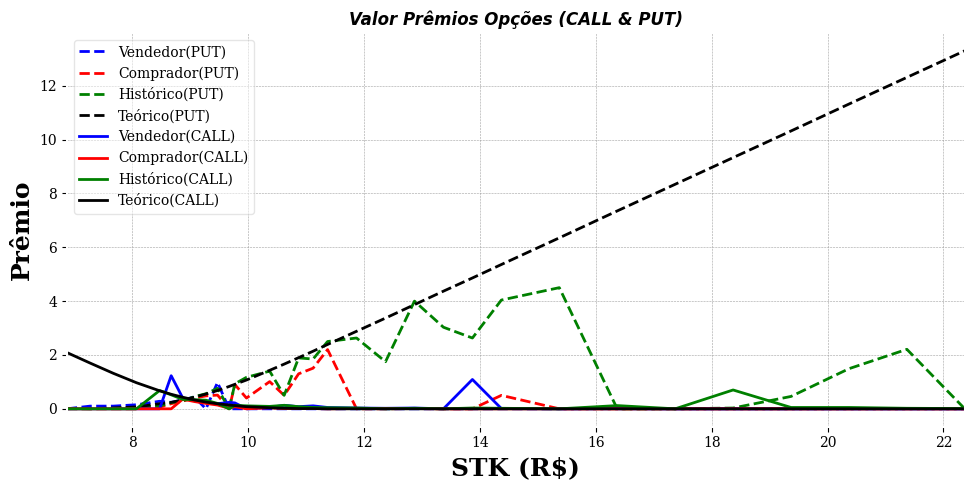

In [ ]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,5))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=12, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Ask.1'],label='Vendedor(PUT)', color='blue',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid.1'],label='Comprador(PUT)', color='red',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Ask'],label='Vendedor(CALL)', color='blue', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid'],label='Comprador(CALL)', color='red', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

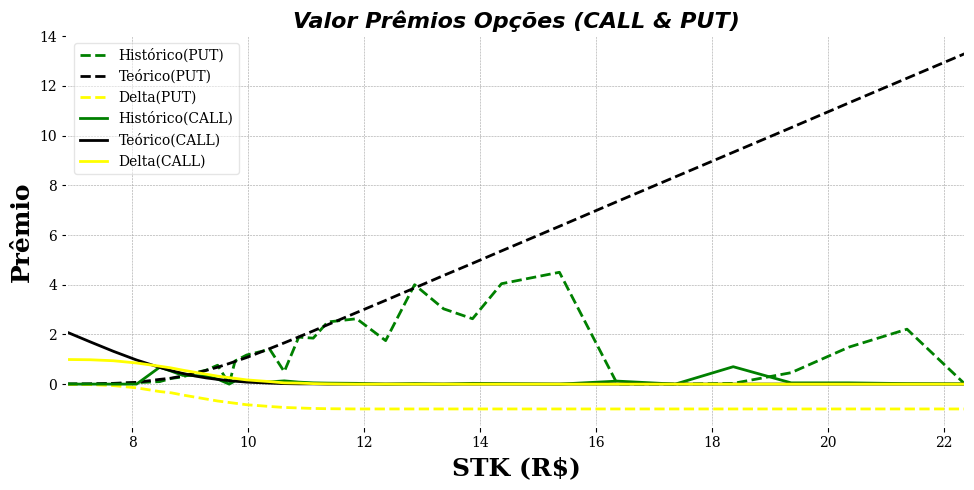

In [ ]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,5))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta.1'],label='Delta(PUT)', color='yellow',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta'],label='Delta(CALL)', color='yellow', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

#Conclusões:


In [ ]:
PUTs_OTM

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,2.09,0.99,-0.0039,2.04,-2.04,0.00,0.00,6.87,0.01,0.00,0.01,0.0,-0.0005,-0.01,0.00,0.01
1,0.00,1.70,0.98,-0.0052,1.64,-1.64,0.00,0.00,7.27,0.00,0.10,0.00,0.0,-0.0016,-0.02,0.01,0.00
2,0.00,1.32,0.94,-0.0077,1.24,-1.24,0.00,0.00,7.67,0.00,0.10,0.02,0.0,-0.0039,-0.06,0.03,0.02
3,0.00,0.97,0.85,-0.0111,0.84,-0.84,0.00,0.00,8.07,0.00,0.15,0.06,0.0,-0.0071,-0.15,0.07,0.06
4,0.68,0.67,0.72,-0.0142,0.44,0.24,0.00,0.00,8.47,0.06,0.28,0.10,0.0,-0.0103,-0.30,0.19,0.10
5,0.52,0.54,0.65,-0.0152,0.24,0.28,0.00,1.23,8.67,0.19,0.24,0.23,0.0,-0.0109,-0.35,0.24,0.23
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.40,8.87,0.29,0.33,0.29,0.0,-0.0112,-0.44,0.33,0.29


In [ ]:
#PUTs_OTM.describe()

In [ ]:
P_max = PUTs_OTM.iat[-1,11]
P_max

0.29

In [ ]:
Linha_P_max = PUTs_OTM[(PUTs_OTM['Extrínseco.1'] == P_max)]
Linha_P_max

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.4,8.87,0.29,0.33,0.29,0.0,-0.0112,-0.44,0.33,0.29


In [ ]:
# Strike (R$) para o prêmio máximo
Strike_Pmax = Linha_P_max.iat[0,8]
Strike_Pmax

8.87

In [ ]:
#Valor do prêmio máximo em percentual
Prêmio_perc = P_max/Strike_Pmax
Prêmio_perc

0.03269447576099211

In [ ]:
# Strike (R$) para o menor delta do conjunto
Strike_Deltamin = PUTs_OTM.iat[0,8]
Strike_Deltamin

6.87

In [ ]:
# Distância (%) entre o valor do Ativo e do strike do menor delta
Delta_Ativo_perc = (Ativo - Strike_Deltamin)/Ativo
Delta_Ativo_perc

0.22285069214746306

*   A inclinação é a razão entre o cateto oposto e o adjacente (tan)
*   Quanto menor o valor da inclinação, melhor
*   A inclinação para um prêmio de 1% num delta de 25% seria de 4%;
*   A inclinação para um prêmio de 1% num delta de 50% seria de 2%;
*   Se a inclinação é maior (Muito prêmio e pouco Delta);
*   Combinado com baixa volatilidade é uma oportunidade.



In [ ]:
Inclinação = Prêmio_perc/Delta_Ativo_perc
Inclinação

0.14671022757855187

In [ ]:
Tabela = [[P_max, Strike_Pmax, Prêmio_perc,0, Strike_Deltamin]]

In [ ]:
Tabela1 = pd.DataFrame(Tabela, columns=['Prêmio Max (R$)', 'Stk Max (R$)', 'Prêmio(%)', 'D_min(%)', 'Stk_Dmin (R$)'])
print(Tabela1)

   Prêmio Max (R$)  Stk Max (R$)  Prêmio(%)  D_min(%)  Stk_Dmin (R$)
0             0.29          8.87   0.032694         0           6.87


In [ ]:
Ativo

8.84000015258789

In [ ]:
CALLs_OTM1 = Opções[(Opções['Strike']>=Ativo)]
CALLs_OTM1

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.40,8.87,0.29,0.33,0.29,0.00,-0.0112,-0.44,0.33,0.29
7,0.34,0.33,0.48,-0.0155,0.00,0.34,0.27,0.31,9.07,0.40,0.44,0.29,0.16,-0.0109,-0.52,0.43,0.45
8,0.32,0.25,0.40,-0.0147,0.00,0.32,0.20,0.24,9.27,0.48,0.00,0.20,0.36,-0.0101,-0.60,0.55,0.56
9,0.20,0.19,0.32,-0.0135,0.00,0.20,0.14,0.19,9.47,0.51,0.98,0.20,0.56,-0.0088,-0.68,0.68,0.76
10,0.00,0.14,0.26,-0.0120,0.00,0.00,0.02,0.24,9.67,0.00,0.00,-0.76,0.76,-0.0072,-0.74,0.83,0.00
11,0.13,0.12,0.23,-0.0111,0.00,0.13,0.08,0.22,9.77,0.90,0.00,0.07,0.86,-0.0063,-0.77,0.91,0.93
12,0.11,0.08,0.17,-0.0094,0.00,0.11,0.00,0.00,9.97,0.40,0.00,0.11,1.06,-0.0044,-0.83,1.07,1.17
13,0.09,0.04,0.10,-0.0061,0.00,0.09,0.04,0.05,10.37,1.01,0.00,-0.06,1.46,-0.0010,-0.90,1.43,1.40
14,0.13,0.02,0.05,-0.0038,0.00,0.13,0.01,0.13,10.62,0.50,0.00,-1.21,1.71,0.0009,-0.94,1.66,0.50
15,0.08,0.01,0.04,-0.0031,0.00,0.08,0.01,0.08,10.87,1.30,0.00,-0.07,1.96,0.0023,-0.96,1.90,1.89


Maximo_Call = CALLs_OTM1['Último'].max()
Maximo_Call

In [ ]:
#Valor do prêmio máximo em percentual
P_max_call = CALLs_OTM1.iat[0,0]
P_max_call

0.35

In [ ]:
Linha_P_maxcall = CALLs_OTM1[(CALLs_OTM1['Último'] == P_max_call)]
Linha_P_maxcall

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.4,8.87,0.29,0.33,0.29,0.0,-0.0112,-0.44,0.33,0.29


In [ ]:
# Strike (R$) para o prêmio máximo
Strike_Pmaxcall = Linha_P_maxcall.iat[0,8]
Strike_Pmaxcall

8.87

In [ ]:
#Valor do prêmio máximo em percentual
Prêmio_percall = P_max_call/Strike_Pmaxcall
Prêmio_percall

0.03945885005636979

In [ ]:
# Separando os deltas menores que Zero
Deltas_Mínimos = CALLs_OTM1[(CALLs_OTM1['Delta']<=0)]
Deltas_Mínimos

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
18,0.03,0.0,0.0,-0.0005,0.0,0.03,0.01,0.03,11.87,0.00,0.0,-0.33,2.96,0.0054,-1.0,2.88,2.63
19,0.00,0.0,0.0,-0.0002,0.0,0.00,0.01,0.02,12.37,0.00,0.0,-1.71,3.46,0.0060,-1.0,3.37,1.75
20,0.02,0.0,0.0,-0.0001,0.0,0.02,0.01,0.03,12.87,0.01,0.0,0.04,3.96,0.0064,-1.0,3.87,4.00
21,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,13.37,0.00,0.0,-1.43,4.46,0.0066,-1.0,4.37,3.03
22,0.03,0.0,0.0,0.0000,0.0,0.03,0.00,1.09,13.87,0.00,0.0,-2.33,4.96,0.0069,-1.0,4.86,2.63
23,0.02,0.0,0.0,0.0000,0.0,0.02,0.00,0.01,14.37,0.50,0.0,-1.42,5.46,0.0072,-1.0,5.36,4.04
24,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,15.37,0.00,0.0,-1.96,6.46,0.0077,-1.0,6.35,4.50
25,0.12,0.0,0.0,0.0000,0.0,0.12,0.00,0.01,16.37,0.00,0.0,-7.46,7.46,0.0082,-1.0,7.35,0.00
26,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,17.37,0.00,0.0,-8.46,8.46,0.0087,-1.0,8.34,0.00
27,0.70,0.0,0.0,0.0000,0.0,0.70,0.00,0.00,18.37,0.00,0.0,-9.43,9.46,0.0092,-1.0,9.33,0.03


In [ ]:
Strike_Deltamincall = Deltas_Mínimos.iat[0,8]
Strike_Deltamincall

11.87

In [ ]:
# Distância (%) entre o valor do Ativo e do strike do menor delta
Deltacall_Ativo_perc = -(Ativo - Strike_Deltamincall)/Ativo
Deltacall_Ativo_perc

0.3427601578179931

In [ ]:
Inclinaçãocall = Prêmio_percall/Deltacall_Ativo_perc
Inclinaçãocall

0.11512087725587575

In [ ]:
Tabela2 = [[P_max_call, Strike_Pmaxcall, Prêmio_percall, 0, Strike_Deltamincall]]

In [ ]:
Tabela3 = [['PUT',P_max, Strike_Pmax, Prêmio_perc*100, Inclinação, Strike_Deltamin],
            ['CALL',P_max_call, Strike_Pmaxcall, Prêmio_percall*100, Inclinaçãocall, Strike_Deltamincall]]

Tabela_Final = pd.DataFrame(Tabela3, columns=['Tipo','Prêmio Max (R$)', 'Stk Max (R$)', 'Prêmio(%)', 'Inclin(%)', 'Stk_Dmin (R$)'])

print(Tabela_Final)

   Tipo  Prêmio Max (R$)  Stk Max (R$)  Prêmio(%)  Inclin(%)  Stk_Dmin (R$)
0   PUT             0.29          8.87   3.269448   0.146710           6.87
1  CALL             0.35          8.87   3.945885   0.115121          11.87
